In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# visualization
import seaborn as sns
import matplotlib.pyplot as pl
import calendar   
from zipfile import ZipFile
import io

In [3]:
def read_zip(zip_fn, extract_fn=None):
    zf = ZipFile(zip_fn)
    if extract_fn:
        return zf.read(extract_fn)
    else:
        return {name:zf.read(name) for name in zf.namelist()}

**Reading feature, sales and strores data**

In [ ]:
#io.BytesIO(read_zip('retaildataset/Features data set.csv.zip', 'retaildataset/Features data set.csv'))

In [8]:
feature_file = 'Features data set.csv'
sales_file = 'sales data-set.csv'
stores_file = 'stores data-set.csv'
feature_data = pd.read_csv(feature_file)
sales_data = pd.read_csv(sales_file)
stores_data = pd.read_csv(stores_file)

In [9]:
print(feature_data.columns.tolist())

['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'IsHoliday']


In [10]:
print(sales_data.columns.tolist())

['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday']


In [11]:
print(stores_data.columns.tolist())

['Store', 'Type', 'Size']


In [12]:
sales_data['Date'] = pd.to_datetime(sales_data['Date'])
feature_data['Date'] = pd.to_datetime(feature_data['Date'])

**Weekly sales for each stores **

Text(0.04, 0.5, 'Number')

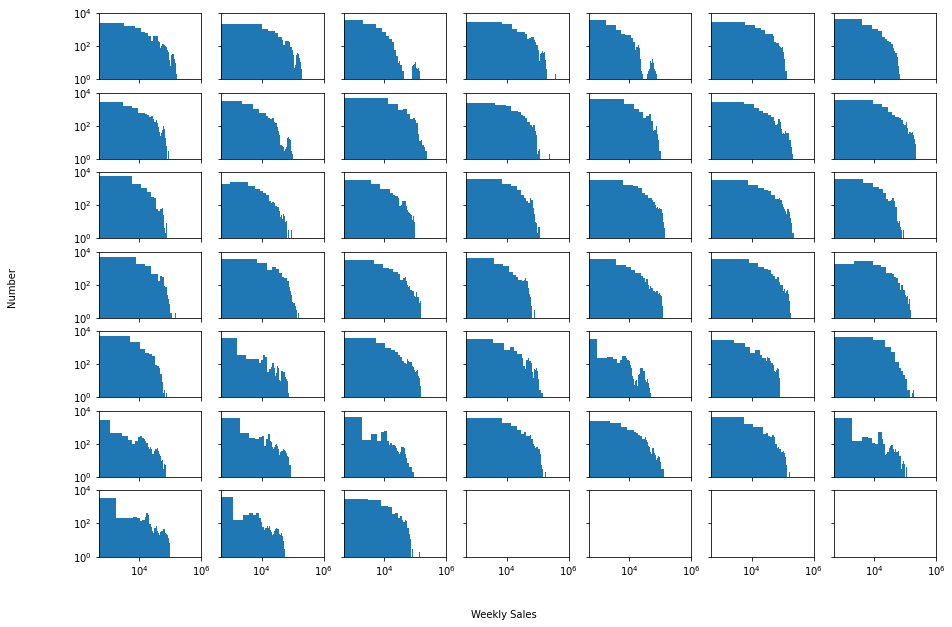

In [13]:
fig, axarr = pl.subplots(7, 7, sharex=True, sharey=True,figsize=(15,10))
s = 1
for i in range(0, 7):
    for j in range(0, 7):
        xxx = axarr[i,j].hist(sales_data['Weekly_Sales'].loc[sales_data['Store'] == s], 50);
        axarr[i,j].set_yscale('log')
        axarr[i,j].set_xscale('log')
        axarr[i,j].set_ylim(1,1e4)
        axarr[i,j].set_xlim(5e2,1e6)

        s += 1
fig.text(0.5, 0.04, 'Weekly Sales', ha='center')
fig.text(0.04, 0.5, 'Number', va='center', rotation='vertical')

In [20]:
stores_data['SizeBand'] = pd.cut(stores_data['Size'], bins=4, labels=np.arange(1, 5)).astype(np.int)

In [21]:
StoreSizeDict = stores_data.set_index('Store').to_dict()['SizeBand']
StoreTypeDict = stores_data.set_index('Store').to_dict()['Type']

In [22]:
sales_data['SizeBand'] = sales_data['Store']
sales_data['SizeBand'] = sales_data['SizeBand'].map(StoreSizeDict)
sales_data['Type'] = sales_data['Store'].map(StoreTypeDict)

**Sum of weekly sales for month for  2010-2012**

Text(0.04, 0.5, 'Number')

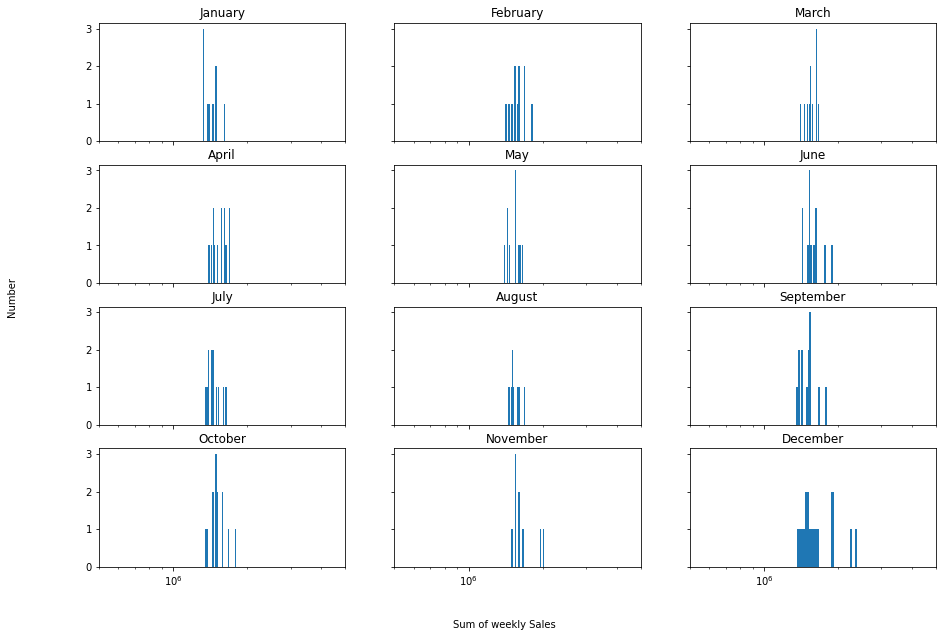

In [23]:
fig, axarr = pl.subplots(4, 3, sharex=True, sharey=True,figsize=(15,10))
s, m = 1, 1
for i in range(0, 4):
    for j in range(0, 3):
        tdf = sales_data.loc[(sales_data['Store'] == s) & (sales_data['Date'].dt.month == m)]
        tdf = tdf.groupby('Date')['Weekly_Sales'].sum().reset_index()
        xxx = axarr[i,j].hist(tdf['Weekly_Sales'], 20);
        axarr[i,j].set_title('%s'%calendar.month_name[m])
        axarr[i,j].set_xscale('log')
        axarr[i,j].set_xlim(5e5,5e6)
        m += 1
fig.text(0.5, 0.04, 'Sum of weekly Sales', ha='center')
fig.text(0.04, 0.5, 'Number', va='center', rotation='vertical')

**Monthly sales by 2010, 2011 and 2012 separately**

Text(0.04, 0.5, 'Number')

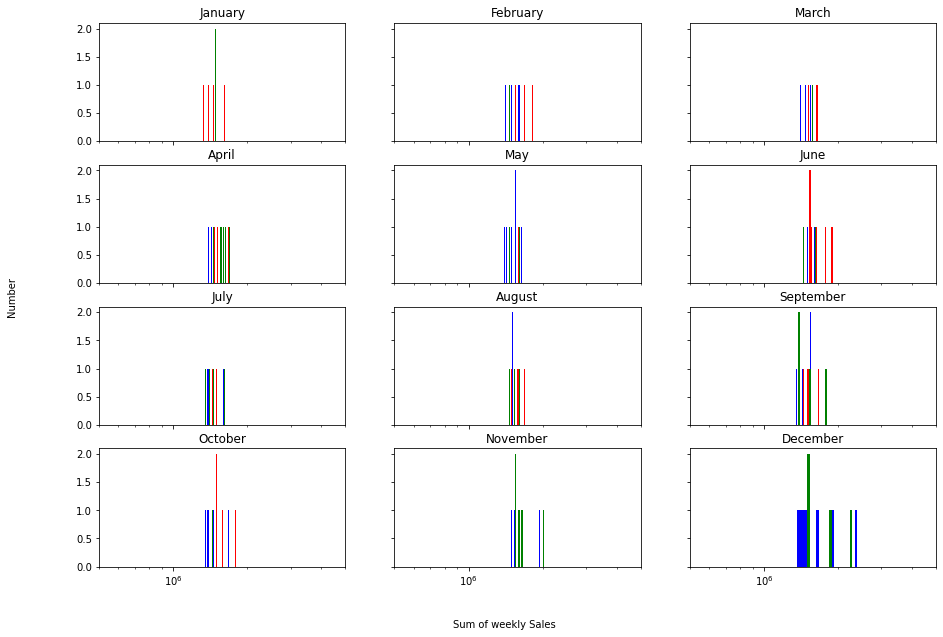

In [24]:
fig, axarr = pl.subplots(4, 3, sharex=True, sharey=True,figsize=(15,10))
s, m = 1, 1
for i in range(0, 4):
    for j in range(0, 3):
        tdf = sales_data.loc[(sales_data['Store'] == s) 
                             & (sales_data['Date'].dt.month == m) 
                             & (sales_data['Date'].dt.year == 2010)]
        tdf = tdf.groupby('Date')['Weekly_Sales'].sum().reset_index()
        xxx = axarr[i,j].hist(tdf['Weekly_Sales'], 20, color='b');#, histtype='step');
        
        tdf = sales_data.loc[(sales_data['Store'] == s) 
                             & (sales_data['Date'].dt.month == m) 
                             & (sales_data['Date'].dt.year == 2011)]
        tdf = tdf.groupby('Date')['Weekly_Sales'].sum().reset_index()
        xxx = axarr[i,j].hist(tdf['Weekly_Sales'], 20, color='g');#, histtype='step');
        
        tdf = sales_data.loc[(sales_data['Store'] == s) 
                             & (sales_data['Date'].dt.month == m) 
                             & (sales_data['Date'].dt.year == 2012)]
        tdf = tdf.groupby('Date')['Weekly_Sales'].sum().reset_index()
        xxx = axarr[i,j].hist(tdf['Weekly_Sales'], 20, color='r');#, histtype='step');
        axarr[i,j].set_title('%s'%calendar.month_name[m])
        axarr[i,j].set_xscale('log')
        axarr[i,j].set_xlim(5e5,5e6)
        m += 1
fig.text(0.5, 0.04, 'Sum of weekly Sales', ha='center')
fig.text(0.04, 0.5, 'Number', va='center', rotation='vertical')

**Combin features & sales databases**

In [28]:
sales_feature = sales_data.merge(feature_data, left_on=('Store', 'Date'), 
                                 right_on=('Store', 'Date'), how='left')

In [29]:
sales_feature.columns.tolist()

['Store',
 'Dept',
 'Date',
 'Weekly_Sales',
 'IsHoliday_x',
 'SizeBand',
 'Type',
 'Temperature',
 'Fuel_Price',
 'MarkDown1',
 'MarkDown2',
 'MarkDown3',
 'MarkDown4',
 'MarkDown5',
 'CPI',
 'Unemployment',
 'IsHoliday_y']

In [30]:
sales_feature.Type.unique()

array(['A', 'B', 'C'], dtype=object)

In [31]:
sales_feature = sales_feature.drop(['IsHoliday_y'], axis=1)
sales_feature = sales_feature.rename(columns = {'IsHoliday_x':'IsHoliday'})
sales_feature['IsHoliday'] = sales_feature['IsHoliday'].astype(int)

In [32]:
# Compute the correlation matrix
corr = sales_feature.drop(['Store', 'Dept'], axis=1).corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

**Dependence of MarkDown2 and MarDown3 on Holiday** : 
1. It is seen that there is a positive correlation between holiday weekends and markdown 2 and 3. 
2. There is positive correlation between the size of the store and the MarkDown 1, 4 and 4  
3. There is a positive correlation between size of the store and the weekly sales. However,  it may be a systematic correlation as there are many employees needs to be worked for a larger store. 
4. There is a marginal positive correlation between the fuel price and MarkDown 1 but all other MarkDowns are negatively correlated with fuel price.
5.  Temperature of the region is mostly anticorrelated with the MarkDowns and no correlation between weekly sales 
6. CPI and unemployment are marginally anticorrelated with MarkDowns and no correlation between weekly sales  

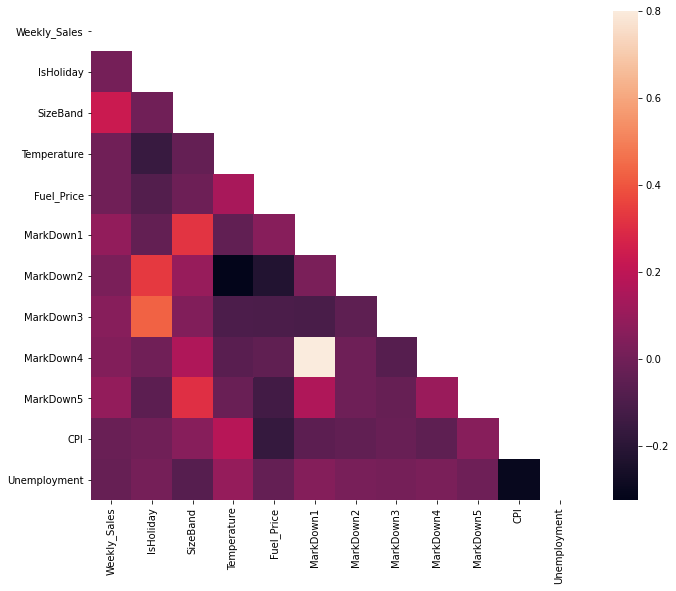

In [33]:
#correlation matrix
f, ax = pl.subplots(figsize=(12, 9))
sns.heatmap(sales_feature.drop(['Store', 'Dept'], axis=1).corr(), mask=mask, vmax=.8, square=True);

**How the type of stores have correlation**: Similar conclusions for A and B  type of stores can be derived. There are slight difference between these conclusion and C type stores 

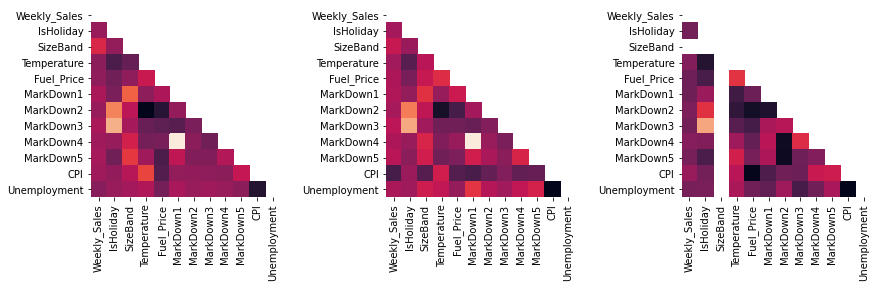

In [34]:
#correlation matrix
fig, axarr = pl.subplots(1,3, figsize=(15, 3.5))
sns.heatmap(sales_feature.drop(['Store', 'Dept'], axis=1)[sales_feature.Type == 'A'].corr(), mask=mask, vmax=.6, 
            square=True, ax=axarr[0], cbar=None);
sns.heatmap(sales_feature.drop(['Store', 'Dept'], axis=1)[sales_feature.Type == 'B'].corr(), mask=mask, vmax=.6, 
            square=True, ax=axarr[1], cbar=None);
sns.heatmap(sales_feature.drop(['Store', 'Dept'], axis=1)[sales_feature.Type == 'C'].corr(), mask=mask, vmax=.6, 
            square=True, ax=axarr[2], cbar=None);